In [204]:

import pandas as pd
import plotly.graph_objects as go
import numpy as np
import gseapy as gp
import pickle
from pathlib import Path
import gseapy as gp
from gseapy import barplot, dotplot
import matplotlib.pyplot as plt



# load merged dataframe
df = pd.read_csv("/Users/paulinestaiber/Documents/Network/Pauline_Praktikum/results/merged_dataframe_new.tsv", sep="\t")
df.head()

,node_id,module_merged,node_name
0,327,1,RPL3L
1,2737,1,EIF4A2
2,3315,1,RPS18
3,3601,1,RPS4Y2
4,4369,1,RPL28


In [170]:
gp.__version__

'1.1.11'

In [ ]:
# read in infomap output
modules_sig_enriched = pd.read_csv(
    "/Users/paulinestaiber/Documents/Network/Pauline_Praktikum/sig_enriched_modules_stats.csv",
    index_col=0  # Erste Spalte als Index verwenden
)

modules_sig_enriched
modules_of_interest = modules_sig_enriched["module_merged"].tolist()


In [ ]:
# get genes per module of interest
genes_per_module = {}
for module in modules_of_interest:
    genes = df[df["module_merged"] == module]["node_name"].to_list()
    genes = pd.Series(genes).unique().tolist()
    genes_per_module[f"Module{module}"] = genes
    print(f"Module {module}: {len(genes)} genes")

genes_per_module




Module 12: 250 genes
['KCNA5', 'MBLAC1', 'TNNI3K', 'RYR2', 'CALR3', 'MYOZ2', 'EYA4', 'ACTA1', 'LIAT1', 'COL6A3', 'MIB1', 'VCL', 'TMPO', 'TPM3', 'SUMO4', 'TPM2', 'PKP2', 'DYSF', 'DNM2', 'RPP14', 'ACTN2', 'BRMS1L', 'DNAJB6', 'DES', 'NEB', 'DSG2', 'BIN1', 'SGCB', 'TRPM4', 'TCAP', 'MICAL2', 'PSEN2', 'HLA-DMB', 'SELENON', 'NEXN', 'ITGA7', 'TPM1', 'FHL1', 'GNE', 'CAV3', 'MAP7D3', 'CFAP410', 'CFL2', 'MYOM2', 'CMYA5', 'HSPB2', 'MYBPC2', 'TRIM32', 'CTNNA3', 'FAM162A', 'CMC2', 'SNTA1', 'CHRNA1', 'PRKAG2', 'TTN', 'FHL2', 'DTNA', 'BCL2L15', 'TMEM43', 'SCN2B', 'SGCA', 'DSC2', 'RAB19', 'LAMA2', 'CACNB2', 'MYH6', 'CHRNA2', 'MYBPC3', 'GALNT8', 'DOLK', 'FLNC', 'CSRP3', 'HINT1', 'TRDN', 'GAA', 'CRYAB', 'NPPA', 'PM20D1', 'TNNI3', 'STIM1', 'TIA1', 'ORAI1', 'MYH7', 'PLN', 'BAG3', 'CA3', 'LRATD1', 'EFCAB2', 'TMIGD2', 'ANKRD1', 'TNNT2', 'LMOD3', 'CEP85L', 'KLHL40', 'SGCD', 'GPD1L', 'DPM3', 'ACTN3', 'PYGM', 'RBM20', 'LDB3', 'SLC6A6', 'SCN5A', 'CAPN3', 'GFPT1', 'TAGLN', 'ENO3', 'SGCG', 'VMA21', 'TLL2', 'MKL2',

In [ ]:
# load GSEA libraries
libraries = {}

folder_path = Path("/Users/paulinestaiber/Documents/Network/Pauline_Praktikum/Data/raw/GSEA_libraries")
files = folder_path.glob("*.pkl")

for file in files:
    library_name = file.stem
    with open(file, 'rb') as f:
        libraries[library_name] = pickle.load(f)
    print(f"Loaded {library_name}")

print(f"\nTotal libraries loaded: {len(libraries)}")
print(f"Library names: {list(libraries.keys())}")

type(libraries)  # Example to check the type of one library

Loaded Reactome_Pathways_2024_Human
Loaded GO_Cellular_Component_2023_Human
Loaded WikiPathways_2024_Human_Human
Loaded GO_Biological_Process_2023_Human
Loaded GO_Molecular_Function_2023_Human

Total libraries loaded: 5
Library names: ['Reactome_Pathways_2024_Human', 'GO_Cellular_Component_2023_Human', 'WikiPathways_2024_Human_Human', 'GO_Biological_Process_2023_Human', 'GO_Molecular_Function_2023_Human']


dict

In [190]:
for module_name, gene_list in genes_per_module.items():
    print(gene_list[:5])  # print first 5 genes of each module

['KCNA5', 'MBLAC1', 'TNNI3K', 'RYR2', 'CALR3']


In [191]:

libraries["WikiPathways_2024_Human_Human"] # Example to check the type of one library

{'SRF And miRs In Smooth Muscle Differentiation And Proliferation WP1991': ['MEF2B',
  'CAMK2D',
  'MEF2A',
  'MEF2D',
  'MEF2C',
  'CCND2',
  'MYOCD',
  'BORCS8-MEF2B',
  'SRF',
  'ELK1',
  'KLF4',
  'NKX2-5'],
 'TCA Cycle And Deficiency Of Pyruvate Dehydrogenase Complex PDHc WP2453': ['FH',
  'IDH1',
  'PDHA1',
  'DLST',
  'CS',
  'SDHA',
  'ACLY',
  'PC',
  'DLAT',
  'DLD',
  'SUCLG2',
  'MDH1',
  'ACO1',
  'PCK1',
  'IDH3A',
  'OGDH'],
 'Mammary Gland Development Pathway Embryonic Development Stg 1/4 WP2813': ['TGFB1',
  'ITGB1',
  'TNF',
  'NRG3',
  'SFRP1',
  'CLDN4',
  'ZEB2',
  'ERBB4',
  'CCND1',
  'TERT',
  'CDH1',
  'MYC',
  'AKT1',
  'ALPL',
  'ITGA6'],
 'Initiation Of Transcription And Translation Elongation HIV1 LTR WP3414': ['CREBBP',
  'HEXIM1',
  'NFATC4',
  'NFATC3',
  'NFATC2',
  'NFATC1',
  'NFKB1',
  'SUPT5H',
  'CDK9',
  'NFKBIA',
  'SP1',
  'HDAC5',
  'RELA',
  'HDAC3',
  'HDAC4',
  'HDAC1',
  'NELFA',
  'CCNT1',
  'HDAC2',
  'SUPT4H1',
  'HDAC9',
  'HDAC7',
  'H

In [192]:
# set the background as all genes in the merged dataframe
background_genes = pd.Series(df["node_name"]).unique().tolist()


In [ ]:
# Create output directory
out_root = Path("/Users/paulinestaiber/Documents/Network/Pauline_Praktikum/Data/processed/enrichr_modules_new")
out_root.mkdir(exist_ok=True)

all_results = []
# perform enrich R for each module and each library
for module_name, gene_list in genes_per_module.items():
    module_dir = out_root / module_name
    module_dir.mkdir(exist_ok=True)
    
    for lib_name, gene_set in libraries.items():
        print(f"Processing {module_name} with {lib_name}...")
        
        try:
            enr = gp.enrichr(
                gene_list=gene_list,
                gene_sets=gene_set,         # nur diese Library
                outdir=str(module_dir / lib_name),
                cutoff=0.5,
                background= background_genes
            )
        except ValueError as e:
            # GSEAPY says for 1 Module /Library "No enrich terms ..."
            msg = str(e)
            if "No enrich terms" in msg:
                print(f"  No significant terms (cutoff=0.5) – skipping.")
                continue
            else:
                # if a different error occurs, re-raise it
                raise
        
        # If no error: check results
        if enr.results is None or enr.results.empty or len(enr.results) == 0:
            print(f"  No significant terms in enr.results – skipping.")
            continue
        print(f"  Results for {module_name} / {lib_name} have been generated.")
        df = enr.results.copy()
        df["module"] = module_name
        df["library"] = lib_name
        
        
        all_results.append(df)

# Combine all into one file
all_df = pd.concat(all_results, ignore_index=True)
all_df.to_csv(out_root / "ALL_MODULES_ALL_LIBRARIES.csv", index=False)
        
       
        

Processing Module12 with Reactome_Pathways_2024_Human...
  Results for Module12 / Reactome_Pathways_2024_Human have been generated.
Processing Module12 with GO_Cellular_Component_2023_Human...
  Results for Module12 / GO_Cellular_Component_2023_Human have been generated.
Processing Module12 with WikiPathways_2024_Human_Human...
  Results for Module12 / WikiPathways_2024_Human_Human have been generated.
Processing Module12 with GO_Biological_Process_2023_Human...
  Results for Module12 / GO_Biological_Process_2023_Human have been generated.
Processing Module12 with GO_Molecular_Function_2023_Human...
  Results for Module12 / GO_Molecular_Function_2023_Human have been generated.


In [195]:
all_df.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes,module,library
0,gs_ind_0,AMPK Inhibits chREBP Transcriptional Activatio...,1/8,1.238070e-01,7.153293e-01,12.027655,25.126151,PRKAG2,Module12,Reactome_Pathways_2024_Human
1,gs_ind_0,AURKA Activation by TPX2,1/72,6.963996e-01,9.999960e-01,1.256261,0.454555,CEP43,Module12,Reactome_Pathways_2024_Human
2,gs_ind_0,Acetylcholine Binding and Downstream Events,11/14,6.380146e-18,5.308281e-16,205.902475,8152.366868,CHRNA4;CHRNA3;CHRND;CHRNE;CHRNA1;CHRNB3;CHRNB4...,Module12,Reactome_Pathways_2024_Human
3,gs_ind_0,Acetylcholine Neurotransmitter Release Cycle,2/17,3.091985e-02,3.384910e-01,9.733563,33.837336,CHAT;SLC18A3,Module12,Reactome_Pathways_2024_Human
4,gs_ind_0,Activated NOTCH1 Transmits Signal to the Nucleus,2/31,9.116998e-02,6.539088e-01,5.109470,12.237333,MIB1;PSEN2,Module12,Reactome_Pathways_2024_Human


In [196]:
len(all_df)


2389

In [198]:
#show top 5 terms per module and library 
sig = all_df[all_df["Adjusted P-value"] < 0.05]
print(len(sig))
top_per_mod_lib = (
    sig
    .sort_values("Adjusted P-value")      # zuerst nach Signifikanz sortieren
    .groupby(["module", "library"])      # gruppieren nach Modul + Library
    .head(5)                              # Top 5 je Gruppe
)


print(len(top_per_mod_lib))
top_per_mod_lib[top_per_mod_lib["module"]=="Module12"]



326
25


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes,module,library
203,gs_ind_0,Muscle Contraction,46/192,7.415934e-41,3.085029e-38,23.072866,2131.987188,STIM1;SCN2B;FKBP1B;TNNI3;NEB;ACTN3;TNNT2;TPM2;...,Module12,Reactome_Pathways_2024_Human
1158,gs_ind_0,Muscle Contraction (GO:0006936),33/88,1.051560e-36,1.395420e-33,41.507114,3438.565077,CHRND;SNTB1;LMOD3;CLCN1;TNNT2;SGCA;TPM2;TTN;MY...,Module12,GO_Biological_Process_2023_Human
2031,gs_ind_0,Striated Muscle Contraction (GO:0006941),28/54,2.780109e-36,1.844603e-33,72.433623,5930.182231,LMOD3;SCN2B;TNNI3;TNNT2;TTN;CSRP3;MYH6;SCN4B;R...,Module12,GO_Biological_Process_2023_Human
744,gs_ind_0,Striated Muscle Contraction Pathway WP383,24/38,3.592367e-34,7.184735e-32,111.879044,8615.702436,TNNI3;NEB;ACTN3;TNNT2;MYOM1;TPM2;TTN;ACTN2;MYH...,Module12,WikiPathways_2024_Human_Human
372,gs_ind_0,Striated Muscle Contraction,23/35,2.140645e-33,4.452542e-31,123.951912,9324.183535,TNNI3;NEB;ACTN3;TNNT2;TPM2;TTN;ACTN2;MYH6;MYL2...,Module12,Reactome_Pathways_2024_Human
1048,gs_ind_0,Heart Contraction (GO:0060047),23/39,9.133191e-32,4.039915e-29,93.877922,6709.530929,SCN2B;TNNI3;TNNT2;TTN;SGCG;CSRP3;TRDN;MYH6;SCN...,Module12,GO_Biological_Process_2023_Human
1168,gs_ind_0,Myofibril Assembly (GO:0030239),23/45,9.145499e-30,3.034019e-27,68.816264,4601.350678,LMOD3;TNNT2;TTN;ACTN2;MYLK3;MYOM2;LMOD2;CSRP3;...,Module12,GO_Biological_Process_2023_Human
1991,gs_ind_0,Sarcomere Organization (GO:0045214),19/29,1.027245e-27,2.726308e-25,120.345264,7478.605756,TNNT2;TTN;MYLK3;MYOM2;LMOD2;CSRP3;MYH6;FLNC;CA...,Module12,GO_Biological_Process_2023_Human
542,gs_ind_0,Sarcolemma (GO:0042383),19/50,1.149793e-21,1.759183e-19,40.058932,1931.429610,SYNC;SGCG;FLNC;SSPN;RYR2;VCL;SNTA1;SGCD;SGCB;S...,Module12,GO_Cellular_Component_2023_Human
543,gs_ind_0,Sarcoplasmic Reticulum (GO:0016529),17/41,2.725057e-20,2.084669e-18,45.847354,2065.387190,STIM1;RYR2;CASQ1;KLHL41;THBS4;DMPK;MRLN;RYR1;F...,Module12,GO_Cellular_Component_2023_Human


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/gseapy/plot.py:756: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda _x: _x.sort_values(by=self.colname).tail(self.n_terms))
/var/folders/30/0m_t_bj979z8bps7ch68prbr0000gn/T/ipykernel_61052/1766212782.py:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


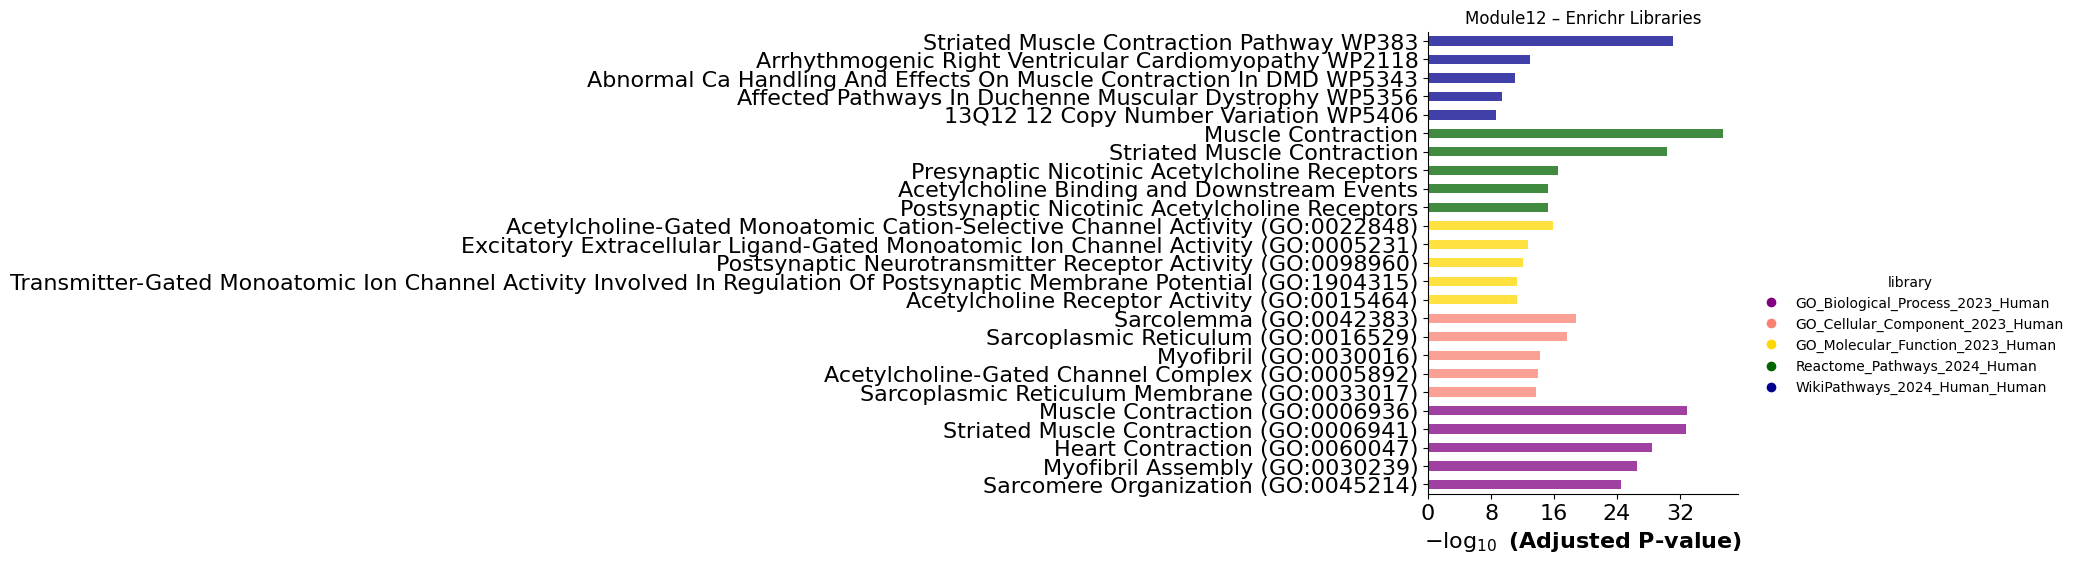

In [ ]:
# define consistent color mapping for libraries
library_colors = {
   
    'GO_Cellular_Component_2023_Human': 'salmon',
    'WikiPathways_2024_Human_Human': 'darkblue',
    'Reactome_Pathways_2024_Human': 'darkgreen',
    'GO_Biological_Process_2023_Human': 'purple',
    'GO_Molecular_Function_2023_Human': 'gold'
}

# do it for all modules
for mod in sorted(all_df['module'].unique()):
    # subset the data for one module
    res = all_df[all_df['module'] == mod].copy()
    
    # only keep top 5 terms per library
    res = (
        res
        .sort_values('Adjusted P-value', ascending=True)
        .groupby('library', group_keys=False)
        .head(5)  # Top 5 Terms per library
    )
    
    # barplot: column = what is plotted; group = category for color grouping
    ax = gp.barplot(
        res,
        column="Adjusted P-value",
        group='library',            
        size=8,             
        figsize=(4, 6),
        color=library_colors        # Mapping: Library → color
    )
    
    ax.set_title(f"{mod} – Enrichr Libraries")
    plt.tight_layout()
    plt.show()

In [239]:
# load disease genes
with open("/Users/paulinestaiber/Documents/Network/Pauline_Praktikum/disease_genes.txt", "r") as f:
    disease_genes = f.read().splitlines()

In [240]:
# define background as all genes in module 12
# define gene_list as intersection of disease genes and genes in module 12
background_genes = genes_per_module["Module12"]
gene_list = list(set(background_genes) & set(disease_genes))
gene_list

['CHRND',
 'GFPT1',
 'DES',
 'SLC18A3',
 'CHRNE',
 'CHRNA1',
 'CHRNB1',
 'CHAT',
 'COLQ',
 'COL13A1',
 'SCN4A']

In [241]:
# enriched terms in disease genes in Module 12 to background (all genes in module 12)
all_res_mod12 = []
for lib_name, gene_set in libraries.items():
        print(f"Processing {module_name} with {lib_name}...")
        enr = gp.enrichr(
                gene_list=gene_list,
                gene_sets=gene_set,         
                outdir=str(module_dir / lib_name),
                cutoff=0.5,
                background= background_genes)
        print(f"  Results for {module_name} / {lib_name} have been generated.")
        df = enr.results.copy()
        df["library"] = lib_name
        
        
        all_res_mod12.append(df)
all_df_12 = pd.concat(all_res_mod12, ignore_index=True) 


Processing Module12 with Reactome_Pathways_2024_Human...
  Results for Module12 / Reactome_Pathways_2024_Human have been generated.
Processing Module12 with GO_Cellular_Component_2023_Human...
  Results for Module12 / GO_Cellular_Component_2023_Human have been generated.
Processing Module12 with WikiPathways_2024_Human_Human...
  Results for Module12 / WikiPathways_2024_Human_Human have been generated.
Processing Module12 with GO_Biological_Process_2023_Human...
  Results for Module12 / GO_Biological_Process_2023_Human have been generated.
Processing Module12 with GO_Molecular_Function_2023_Human...
  Results for Module12 / GO_Molecular_Function_2023_Human have been generated.


In [243]:
#show top 5 terms per library 
sig = all_df_12[all_df_12["Adjusted P-value"] < 0.05]
print(len(sig))
top_per_mod_lib = (
    sig
    .sort_values("Adjusted P-value")      # zuerst nach Signifikanz sortieren
    .groupby(["library"])      # gruppieren  Library
    .head(5)                              # Top 5 je Gruppe
)
top_per_mod_lib


23


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes,library
179,gs_ind_0,Neurotransmitter Receptor Activity Involved In...,3/3,0.000064,0.001539,197.235294,1904.235290,CHRND;CHRNB1;CHRNE,GO_Molecular_Function_2023_Human
185,gs_ind_0,Transmitter-Gated Monoatomic Ion Channel Activ...,3/4,0.000250,0.003003,65.470588,542.943310,CHRND;CHRNB1;CHRNE,GO_Molecular_Function_2023_Human
102,gs_ind_0,Chemical Synaptic Transmission (GO:0007268),6/20,0.000044,0.003135,18.379310,184.561375,CHRND;SLC18A3;CHRNA1;CHRNB1;CHAT;CHRNE,GO_Biological_Process_2023_Human
50,gs_ind_0,Acetylcholine-Gated Channel Complex (GO:0005892),4/10,0.000380,0.003796,21.553846,169.768524,CHRND;CHRNE;CHRNB1;CHRNA1,GO_Cellular_Component_2023_Human
69,gs_ind_0,Monoatomic Ion Channel Complex (GO:0034702),4/10,0.000380,0.003796,21.553846,169.768524,CHRND;CHRNE;CHRNB1;CHRNA1,GO_Cellular_Component_2023_Human
71,gs_ind_0,Neuromuscular Junction (GO:0031594),4/8,0.000133,0.003796,31.400000,280.356019,CHRND;CHRNE;CHRNB1;CHRNA1,GO_Cellular_Component_2023_Human
186,gs_ind_0,Transmitter-Gated Monoatomic Ion Channel Activ...,4/12,0.000854,0.004098,16.341176,115.463805,CHRND;CHRNE;CHRNB1;CHRNA1,GO_Molecular_Function_2023_Human
170,gs_ind_0,Excitatory Extracellular Ligand-Gated Monoatom...,4/12,0.000854,0.004098,16.341176,115.463805,CHRND;CHRNE;CHRNB1;CHRNA1,GO_Molecular_Function_2023_Human
166,gs_ind_0,Acetylcholine-Gated Monoatomic Cation-Selectiv...,4/12,0.000854,0.004098,16.341176,115.463805,CHRND;CHRNE;CHRNB1;CHRNA1,GO_Molecular_Function_2023_Human
97,gs_ind_0,Anterograde Trans-Synaptic Signaling (GO:0098916),5/17,0.000284,0.010239,15.400000,125.742763,CHRND;SLC18A3;CHRNA1;CHRNB1;CHRNE,GO_Biological_Process_2023_Human


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/gseapy/plot.py:756: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda _x: _x.sort_values(by=self.colname).tail(self.n_terms))
/var/folders/30/0m_t_bj979z8bps7ch68prbr0000gn/T/ipykernel_61052/3396101408.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


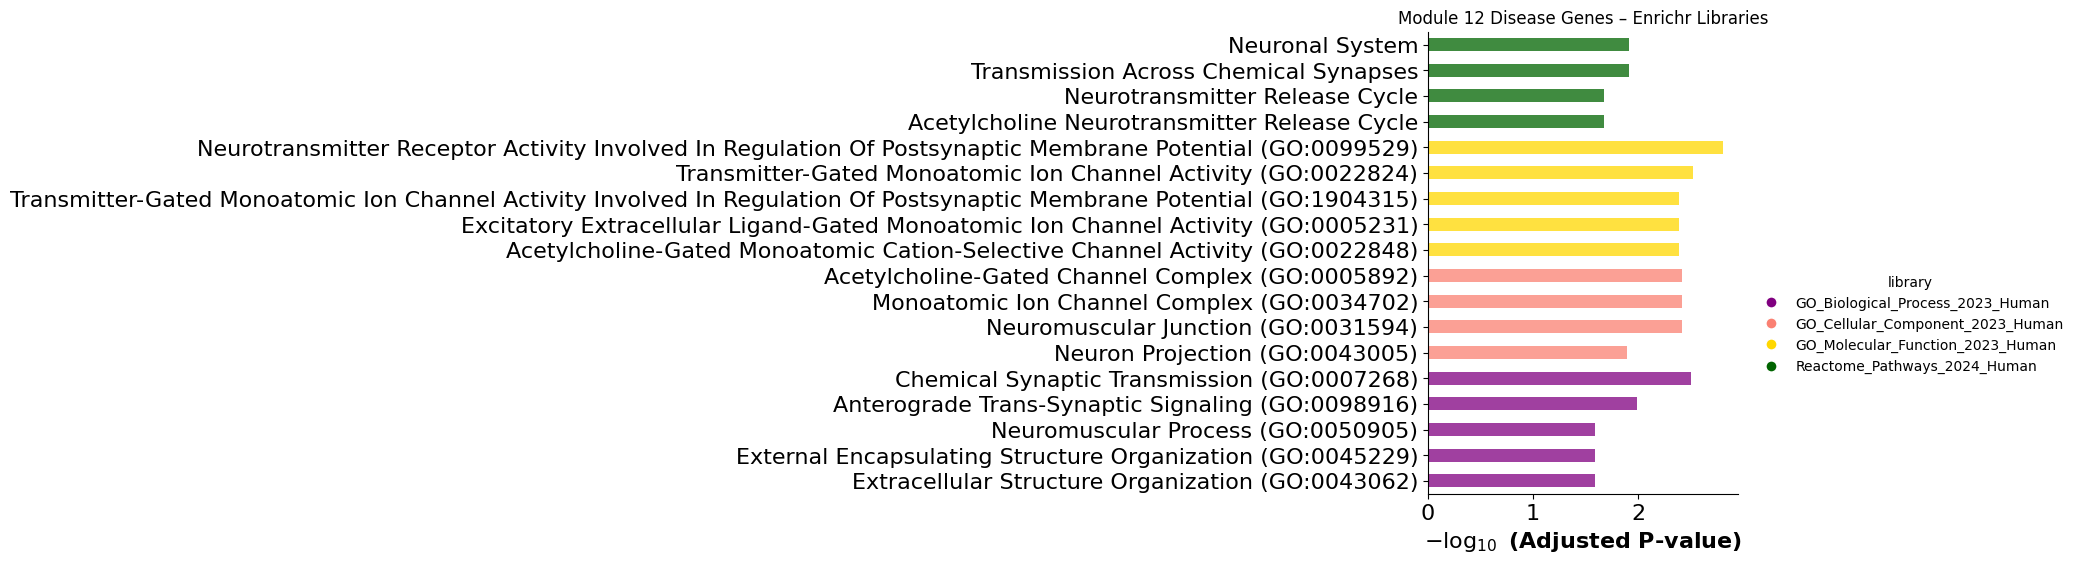

In [234]:
# define consistent color mapping for libraries
library_colors = {
    'GO_Cellular_Component_2023_Human': 'salmon',
    'WikiPathways_2024_Human_Human': 'darkblue',
    'Reactome_Pathways_2024_Human': 'darkgreen',
    'GO_Biological_Process_2023_Human': 'purple',
    'GO_Molecular_Function_2023_Human': 'gold'
}

# only keep top 5 terms per library
res = (
    all_df_12
    .sort_values('Adjusted P-value', ascending=True)
    .groupby('library', group_keys=False)
    .head(5)  # Top 5 Terms per library
)

# barplot: column = what is plotted; group = category for color grouping
ax = gp.barplot(
    res,
    column="Adjusted P-value",
    group='library',            
    size=8,             
    figsize=(4, 6),
    color=library_colors        # Mapping: Library → color
)

ax.set_title("Module 12 Disease Genes – Enrichr Libraries")
plt.tight_layout()
plt.show()